# **Israel Elections Data Analysis - lab 1**

An example notebook showing how to read and display the Israel 2021 elections results. This is the notebook for the first week.

In this work we used the example notebook that was in the lesson, and added  changes to it, as instructed in the lab instructions. 

In [13]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running locally on Jupyter


In [14]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!
import sys
#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 



# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [32]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)
import matplotlib.pyplot as plt


*** 

***upload the data***

First, we need to mount our local drive to the colab network

In [33]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/david/Desktop/third-year/A/lab-statistics/"  


Another option is to upload the data directly

In [34]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

In [35]:
import io

data_type = "city" # "ballot"  # city
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[8:-1]] # removing "metadata" columns
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe


Q1:


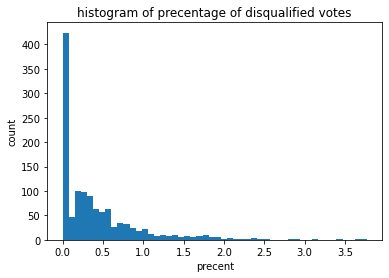

the 3 cities with the heigsht precentage of disqualified votes are:
סואעד חמרייה: 3.774
ניין: 3.649
מאיר שפיה: 3.448


In [36]:
# QUESTION 1

import matplotlib.pyplot as plt

rejected = df_2021_raw["פסולים"][:-1] # the -1 is to take out the: מעטפות חיצוניות
votes = df_2021_raw["מצביעים"][:-1]

rejected_np = rejected.to_numpy()
votes_np = votes.to_numpy()
precent_per_city = rejected_np * 100 / votes_np

m = np.max(precent_per_city)
city_names = df_2021_raw.index.values
plt.hist(precent_per_city, 50, range=[0, m])
plt.title("histogram of precentage of disqualified votes")
plt.ylabel("count")
plt.xlabel("precent")
plt.show()

n = 3 # number of max precent cities to take
indices = (-precent_per_city).argsort()[:n]
print("the 3 cities with the heigsht precentage of disqualified votes are:")
# print(city_names[indices[0]])
print(city_names[indices[0]] + ": " + str(np.round(precent_per_city[indices[0]], 3)))
print(city_names[indices[1]] + ": " + str(np.round(precent_per_city[indices[1]], 3)))
print(city_names[indices[2]] + ": " + str(np.round(precent_per_city[indices[2]], 3)))

Q2:

['אשדוד' 'אשקלון']


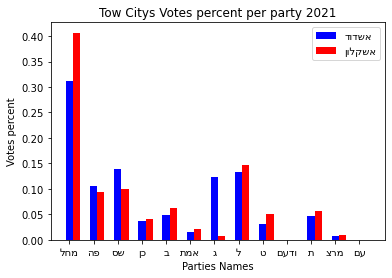

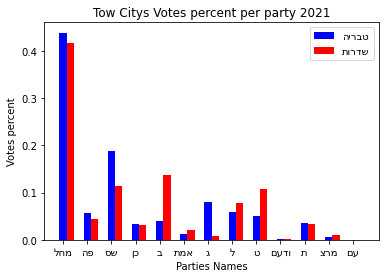

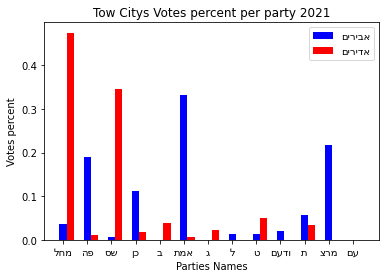

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Tow Citys Votes percent per party 2021'}, xlabel='Parties Names', ylabel='Votes percent'>)

In [37]:
# QUESTION 2:

df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]


def tow_city_threshold(df, thresh , city1, city2):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city1_votes = df.loc[city1,names] / df.loc[city1,names].sum()
    city2_votes = df.loc[city2,names] / df.loc[city2,names].sum()
    city1_bar = ax.bar(np.arange(n), list(city1_votes), width, color='b')
    city2_bar = ax.bar(np.arange(n)+width, list(city2_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Tow Citys Votes percent per party 2021')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((city1_bar[0], city2_bar[0]), (city1[::-1], city2[::-1]))
    plt.show()

    return fig, ax


big_votes = votes[votes > 50000][0:2]
medium_votes = votes[votes < 50000]
medium_votes = medium_votes[medium_votes > 5000][0:2]
small_votes = votes[votes < 5000][0:2]

print(big_votes.index.values)
#אשדוד-אשקלון
tow_city_threshold(df_2021, 0.0325, big_votes.index.values[0], big_votes.index.values[1]) 
#ניתן לראות כי לאשדוד ואשקלון יש יחס דומה בהצבעות עבור המפלגות
# בנוסף ניתן לראות כי ההבדל העיקרי בין שתי הערים הוא המפלגה החרדית וניתן להסיק כי יש ציבור חרדי גדול באשדוד

#טבריה-שדרות
tow_city_threshold(df_2021, 0.0325, medium_votes.index.values[0], medium_votes.index.values[1])
#גם כאן ניתן לראות יחס דומה של הצבעות
#אך ניתן לראות כי בטסריה יש תמיכה רבה יותר במפלגות החרדיות מאשר שדרות
# ובנוסף בשדרות אחוז התמיכה במפלגת "הבית היהודי" גבוה בהרבה מיזה של טבריה

#אבירים-אדירים
tow_city_threshold(df_2021, 0.0325, small_votes.index.values[0], small_votes.index.values[1])
# כאן ניתן לראות כי יש הבדל גדול מאוד בהצבעה עבור מפלגות וכי באבירים יש תמיכה במפלגות "מרכז-שמאל.
# בניגוד ךאדירים כי יש תמיכה רבה יותר במפלגות הימין


אמת      34269
ב        39693
ג        13767
ודעם     11186
ז           88
זץ          93
ט        27130
י           82
יז        3876
ינ          41
יף          28
יק          44
יר          30
כ           69
כך         105
כן       26736
ל        27483
מחל     103036
מרצ      20403
נ           95
ני          58
נר          44
עם        6627
פה       58002
ףז         501
צי          79
צכ          43
צף          34
ץ           69
ק          106
קי          77
קך          59
קץ         101
ר         1303
רנ         144
רף          77
רק           0
שס       23964
ת        22077
Name: מעטפות חיצוניות, dtype: int64


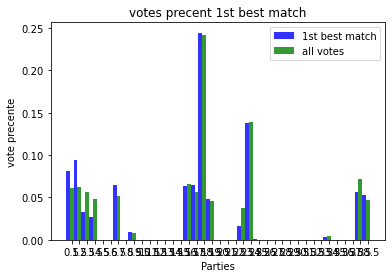

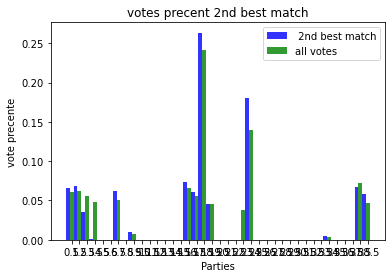

[857 727]


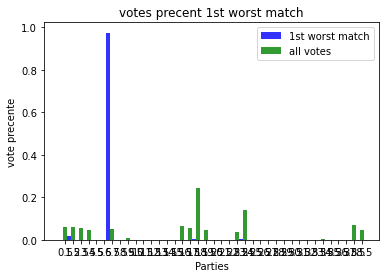

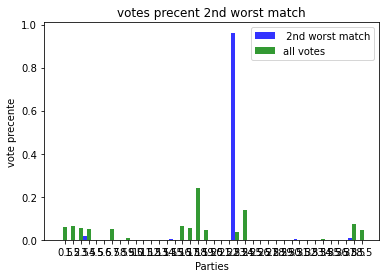

In [39]:
# Question 3
def parties_votes_percents_no_order(df, thresh):
    par = df.sum().div(df.sum().sum())
    return par[par >= thresh]

votes_per_party_raw = parties_votes_percents_no_order(df_2021, 0)
votes_per_party = votes_per_party_raw.to_numpy()


# Function to calculate the MSE between two vectors.
def MSE(vec1, vec2):
    return np.sum((vec1 - vec2) ** 2)

   
total = []    
# Calculate every MSE and add it to total array.
for row in df_2021.iterrows():
  total.append(MSE((row[1].to_numpy() / np.sum(row[1].to_numpy())), votes_per_party))

# Convert the input to an array.
total = np.asarray(total)

# All elements smaller than the 2-th element are moved before this element
# and all equal or greater are moved behind it. The ordering of the elements
# in the two partitions is undefined

idx = np.argpartition(total, 2)
first = df_2021.iloc[idx[0]]
second = df_2021.iloc[idx[1]]
first = first / np.sum(first)
second = second / np.sum(second)


# data for plot
n_groups = len(first)
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8

fig, ax = plt.subplots()
rects1 = plt.bar(index, first, bar_width, alpha=opacity, color='b',label='1st best match')
rects2 = plt.bar(index + bar_width, votes_per_party, bar_width, alpha=opacity, color='g', label='all votes')
plt.xlabel('Parties')
plt.ylabel('vote precente')
plt.title('votes precent 1st best match')
plt.xticks(index + bar_width)
plt.legend()
plt.show()

fig, ax = plt.subplots()
rects1 = plt.bar(index, second, bar_width, alpha=opacity, color='b',label=' 2nd best match')
rects2 = plt.bar(index + bar_width, votes_per_party, bar_width, alpha=opacity, color='g', label='all votes')
plt.xlabel('Parties')
plt.ylabel('vote precente')
plt.title('votes precent 2nd best match')
plt.xticks(index + bar_width)
plt.legend()
# plt.tight_layout()
plt.show()


idx = np.argpartition(total, -2)[-2:]
print(idx)
first = df_2021.iloc[idx[0]]
second = df_2021.iloc[idx[1]]
first = first / np.sum(first)
second = second / np.sum(second)


fig, ax = plt.subplots()
rects1 = plt.bar(index, first, bar_width, alpha=opacity, color='b',label='1st worst match')
rects2 = plt.bar(index + bar_width, votes_per_party, bar_width, alpha=opacity, color='g', label='all votes')
plt.xlabel('Parties')
plt.ylabel('vote precente')
plt.title('votes precent 1st worst match')
plt.xticks(index + bar_width)
plt.legend()
# plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
rects1 = plt.bar(index, second, bar_width, alpha=opacity, color='b',label=' 2nd worst match')
rects2 = plt.bar(index + bar_width, votes_per_party, bar_width, alpha=opacity, color='g', label='all votes')
plt.xlabel('Parties')
plt.ylabel('vote precente')
plt.title('votes precent 2nd worst match')
plt.xticks(index + bar_width)
plt.legend()
# plt.tight_layout()
plt.show()




In [23]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2021".format(df_2021_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')


421619 votes in March 2021 מעטפות חיצוניות 


In [24]:
print(df_2021_raw.columns)
df_2021.head()


Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת', 'Unnamed: 46'],
      dtype='object')


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,...,0,0,0,0,5,0,0,0,1,8
אדירים,1,7,4,0,0,0,9,0,1,0,...,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,2,8
איבים,0,4,0,0,0,1,10,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
df_2021.describe()


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,...,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.0,1215.000000,1215.000000
mean,221.207407,225.379424,204.437037,174.965432,0.325103,0.545679,185.712757,0.667490,28.710288,0.335802,...,0.381070,0.325103,0.423045,0.600000,14.276543,0.978601,0.487243,0.0,260.088889,172.148971
std,1630.890978,1448.009636,2434.859254,924.732474,2.898415,3.250803,1149.958744,4.141412,169.416802,1.836611,...,3.373333,2.498201,2.369937,3.680126,72.194177,5.682239,3.259450,0.0,1759.336035,983.868998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,7.000000
50%,36.000000,19.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,3.000000,16.000000
75%,92.000000,49.000000,3.000000,3.000000,0.000000,0.000000,42.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,24.000000,31.500000
max,38780.000000,39693.000000,58585.000000,14632.000000,88.000000,93.000000,27130.000000,82.000000,3876.000000,41.000000,...,106.000000,77.000000,59.000000,101.000000,1303.000000,144.000000,77.000000,0.0,39151.000000,22077.000000


In [26]:
# df_2021.reset_index(inplace=True)
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()
df_2021[1:4]




,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,...,ק,קי,קך,קץ,ר,רנ,רף,רק,שס,ת
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אדירים,1,7,4,0,0,0,9,0,1,0,...,0,0,0,0,2,0,0,0,61,6
אושה,72,7,0,3,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,15
אחווה,14,4,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,2,8


In [27]:
df_2021.iloc[5]

אמת      0
ב        0
ג        0
ודעם    48
ז        0
זץ       0
ט        0
י        0
יז       0
ינ       0
יף       0
יק       0
יר       0
כ        0
כך       0
כן       0
ל        0
מחל      4
מרצ      0
נ        0
ני       0
נר       0
עם      32
פה       0
ףז       0
צי       0
צכ       0
צף       0
ץ        0
ק        0
קי       0
קך       0
קץ       0
ר        0
רנ       0
רף       0
רק       0
שס       0
ת        0
Name: אלעריאן, dtype: int64

In [28]:
df_2021.loc['הרצליה']

אמת      5127
ב        2680
ג         449
ודעם       92
ז           5
זץ          3
ט         959
י           8
יז        511
ינ          1
יף          1
יק          1
יר          2
כ           2
כך         11
כן       6908
ל        2413
מחל     11580
מרצ      4557
נ           2
ני          3
נר          0
עם          9
פה      14701
ףז         12
צי          7
צכ          2
צף          1
ץ           1
ק           4
קי          1
קך          5
קץ          7
ר         215
רנ         17
רף          1
רק          0
שס       1677
ת        2996
Name: הרצליה, dtype: int64

Now let's do some plotting

<AxesSubplot:>

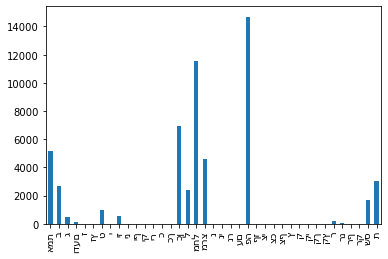

In [29]:
from matplotlib import pyplot as plt
df_2021.loc['הרצליה'].plot.bar()

In [18]:
df_2020.loc['אילת'].plot.bar()

NameError: ignored

Next, we create a function for showing a bar plot of the voting **percentage** in a given city, while showing only the parties above a % threshold 

In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2021, 0.001)  # total votes for each party
total_votes.plot.bar()



In [ ]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax


party_bar(df_2020, 0.0325, 'טבריה')
party_bar(df_2020, 0.0325, 'ירושלים')

Show histogram of number of votes for a column
 


In [ ]:
df_2020_raw['כשרים'].hist(bins=100)